In [ ]:
#Mount Google Drive to enable access to any directory on Drive inside the Colab notebook.
from google.colab import drive
drive.mount('/content/drive')

#Setting up PySpark in Colab, designate where the installer should be located
%cd /content/drive/MyDrive/Big_Data

Mounted at /content/drive
/content/drive/MyDrive/Big_Data


In [ ]:
#Download Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

#Spark Installer 
!wget -v https://dlcdn.apache.org/spark/spark-3.1.3/spark-3.1.3-bin-hadoop3.2.tgz 

--2022-11-27 19:20:36--  https://dlcdn.apache.org/spark/spark-3.1.3/spark-3.1.3-bin-hadoop3.2.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231842529 (221M) [application/x-gzip]
Saving to: ‘spark-3.1.3-bin-hadoop3.2.tgz.2’

spark-3.1.3-bin-had 100%[===================>] 221.10M  71.3MB/s    in 3.1s    

2022-11-27 19:20:45 (71.3 MB/s) - ‘spark-3.1.3-bin-hadoop3.2.tgz.2’ saved [231842529/231842529]



In [ ]:
#Untar the Spark installer
!tar -xvf spark-3.1.3-bin-hadoop3.2.tgz

#Install findspark
!pip install -q findspark

#Set environment variables - Java and Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/drive/MyDrive/Big_Data/spark-3.1.3-bin-hadoop3.2"

#Create local Spark session
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark-3.1.3-bin-hadoop3.2/
spark-3.1.3-bin-hadoop3.2/bin/
spark-3.1.3-bin-hadoop3.2/bin/pyspark.cmd
spark-3.1.3-bin-hadoop3.2/bin/spark-submit
spark-3.1.3-bin-hadoop3.2/bin/spark-submit.cmd
spark-3.1.3-bin-hadoop3.2/bin/spark-class2.cmd
spark-3.1.3-bin-hadoop3.2/bin/spark-shell2.cmd
spark-3.1.3-bin-hadoop3.2/bin/pyspark2.cmd
spark-3.1.3-bin-hadoop3.2/bin/docker-image-tool.sh
spark-3.1.3-bin-hadoop3.2/bin/run-example.cmd
spark-3.1.3-bin-hadoop3.2/bin/spark-submit2.cmd
spark-3.1.3-bin-hadoop3.2/bin/beeline.cmd
spark-3.1.3-bin-hadoop3.2/bin/beeline
spark-3.1.3-bin-hadoop3.2/bin/spark-shell
spark-3.1.3-bin-hadoop3.2/bin/find-spark-home
spark-3.1.3-bin-hadoop3.2/bin/sparkR2.cmd
spark-3.1.3-bin-hadoop3.2/bin/find-spark-home.cmd
spark-3.1.3-bin-hadoop3.2/bin/sparkR
spark-3.1.3-bin-hadoop3.2/bin/spark-class
spark-3.1.3-bin-hadoop3.2/bin/spark-sql2.cmd
spark-3.1.3-bin-hadoop3.2/bin/load-spark-env.cmd
spark-3.1.3-bin-hadoop3.2/bin/run-example
spark-3.1.3-bin-hadoop3.2/bin/spark-sql
spark-3.1.3-b

In [ ]:
!pip install elephas

from elephas.utils.rdd_utils import to_simple_rdd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 7.6 MB/s 
     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 199 kB 52.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=bbf3305a4a02dd2614d81d19a2b73b3839ef1d787133523da9741570a77324b6
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pyspark as spark
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
sc = spark.SparkContext()
sql = spark.SQLContext(sc)
from pyspark.sql.types import *
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


ValueError: ignored

In [ ]:
#loading the preprocessing file generated from the "Data_Preprocessing" file

df = pd.read_csv('/content/drive/MyDrive/Big_Data/Final.csv/part.csv', header = None)
df.columns = ['DateTime','Sentiment_score','Price']
df.sort_values(by=['Price'], ascending = False)
df.head()

,DateTime,Sentiment_score,Price
0,2021-08-01T05:00:00.000Z,0.102206,0.21343
1,2021-08-01T06:00:00.000Z,0.165147,0.21316
2,2021-08-01T07:00:00.000Z,0.101869,0.21247
3,2021-08-01T08:00:00.000Z,0.145027,0.21289
4,2021-08-01T09:00:00.000Z,0.138511,0.21389


In [ ]:
#smoothen the curve of twitter sentiment
import numpy as np
import matplotlib.pyplot as plt

lst = []
for i in range(len(df)):
    lst.append(i)

import statsmodels.api as sm
y_lowess = sm.nonparametric.lowess(df['Sentiment_score'] , lst, frac = 0.07)
for i in range(len(df)):
  df['Sentiment_score'][i] = y_lowess[i][1]


## Plotting the input variables

<Figure size 432x288 with 0 Axes>

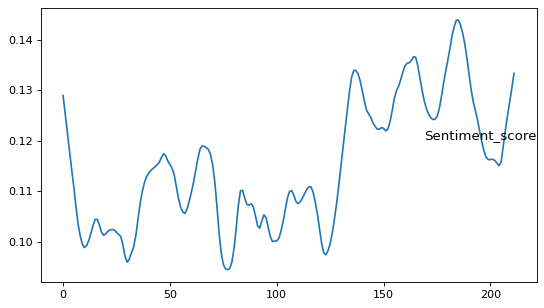

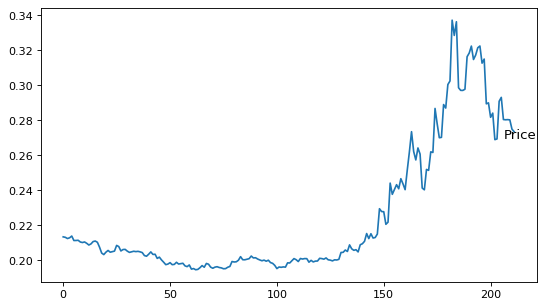

In [ ]:
#graph of sentiment analysis and ethereum price data
values = df.values

# specify columns to plot
groups = [1,2]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.figure(figsize=(8,10), dpi=80, facecolor='w', edgecolor='k')
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

Set index to datetime and change the order of columns

In [ ]:
#converting dataframe to have index as DateTime
df.set_index('DateTime',inplace=True)  
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df


,Price,Sentiment_score
DateTime,,
2021-08-01T05:00:00.000Z,0.21343,0.128940
2021-08-01T06:00:00.000Z,0.21316,0.125268
2021-08-01T07:00:00.000Z,0.21247,0.121555
2021-08-01T08:00:00.000Z,0.21289,0.117874
2021-08-01T09:00:00.000Z,0.21389,0.114338
...,...,...
2021-08-29T04:00:00.000Z,0.28032,0.122173
2021-08-30T03:00:00.000Z,0.28041,0.125025
2021-08-30T04:00:00.000Z,0.28026,0.127699


In [ ]:
#create a scaler and scaled pre-set data variables
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)

In [ ]:
#series to supervised data conversion - Converts the original dataframe to a format which contains lag shifted values of inputs which can be used as input to the LSTM

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
n_hours = 4  #no of time lags
n_features = 2 #no of features
n_obs = n_hours*n_features

In [ ]:

#convert the data
reframed = series_to_supervised(scaled, n_hours, 1)
reframed.head()

,var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
4,0.131767,0.698127,0.129874,0.623865,0.125035,0.548753,0.127980,0.474295,0.134993,0.402777
5,0.129874,0.623865,0.125035,0.548753,0.127980,0.474295,0.134993,0.402777,0.117111,0.333832
6,0.125035,0.548753,0.127980,0.474295,0.134993,0.402777,0.117111,0.333832,0.117251,0.256119
7,0.127980,0.474295,0.134993,0.402777,0.117111,0.333832,0.117251,0.256119,0.118022,0.184535
8,0.134993,0.402777,0.117111,0.333832,0.117251,0.256119,0.118022,0.184535,0.111220,0.136154


In [ ]:
reframed = reframed.drop(reframed.columns[-1], axis=1)
reframed.head()

,var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t)
4,0.131767,0.698127,0.129874,0.623865,0.125035,0.548753,0.127980,0.474295,0.134993
5,0.129874,0.623865,0.125035,0.548753,0.127980,0.474295,0.134993,0.402777,0.117111
6,0.125035,0.548753,0.127980,0.474295,0.134993,0.402777,0.117111,0.333832,0.117251
7,0.127980,0.474295,0.134993,0.402777,0.117111,0.333832,0.117251,0.256119,0.118022
8,0.134993,0.402777,0.117111,0.333832,0.117251,0.256119,0.118022,0.184535,0.111220


In [ ]:
#get training and test split
values = reframed.values
n_train_hours = 106
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train.shape

(106, 9)

In [ ]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(106, 4, 2) (106,) (102, 4, 2) (102, 1)


In [ ]:
# design network
model = Sequential()
model.add(LSTM(4, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=30, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/30
27/27 - 3s - loss: 0.2805 - val_loss: 0.6822 - 3s/epoch - 124ms/step
Epoch 2/30
27/27 - 0s - loss: 0.2262 - val_loss: 0.6074 - 196ms/epoch - 7ms/step
Epoch 3/30
27/27 - 0s - loss: 0.1800 - val_loss: 0.5397 - 196ms/epoch - 7ms/step
Epoch 4/30
27/27 - 0s - loss: 0.1441 - val_loss: 0.4772 - 173ms/epoch - 6ms/step
Epoch 5/30
27/27 - 0s - loss: 0.1263 - val_loss: 0.4388 - 169ms/epoch - 6ms/step
Epoch 6/30
27/27 - 0s - loss: 0.1199 - val_loss: 0.4113 - 228ms/epoch - 8ms/step
Epoch 7/30
27/27 - 0s - loss: 0.1162 - val_loss: 0.3916 - 170ms/epoch - 6ms/step
Epoch 8/30
27/27 - 0s - loss: 0.1133 - val_loss: 0.3741 - 180ms/epoch - 7ms/step
Epoch 9/30
27/27 - 0s - loss: 0.1107 - val_loss: 0.3579 - 191ms/epoch - 7ms/step
Epoch 10/30
27/27 - 0s - loss: 0.1081 - val_loss: 0.3435 - 171ms/epoch - 6ms/step
Epoch 11/30
27/27 - 0s - loss: 0.1057 - val_loss: 0.3303 - 191ms/epoch - 7ms/step
Epoch 12/30
27/27 - 0s - loss: 0.1034 - val_loss: 0.3183 - 185ms/epoch - 7ms/step
Epoch 13/30
27/27 - 0s - l

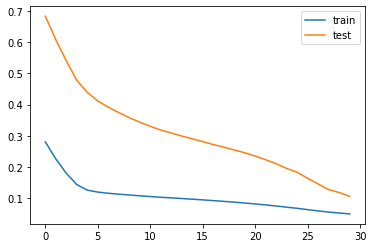

In [ ]:
#loss graph
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours* n_features))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

4/4 [==============================] - 1s 5ms/step
Test RMSE: 0.018


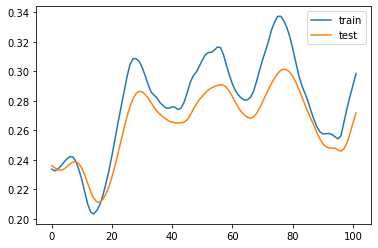

In [ ]:
#predictions
plt.plot(inv_y, label='train')
plt.plot(inv_yhat, label='test')

plt.legend()
plt.show()

In [ ]:
%tensorflow_version 2.x
import json
import requests
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#load data using min-api for dogecoin data
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=DOGE&tsym=USD&limit=2000')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

In [ ]:
hist.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)
hist.head(5)

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2017-06-06,0.061760,0.003298,0.003776,4875505.04,19240.24,0.003535
2017-06-07,0.003842,0.003154,0.003535,4866449.37,16883.03,0.003295
2017-06-08,0.003499,0.003086,0.003295,2947506.77,9941.61,0.003386
2017-06-09,0.003625,0.003292,0.003386,4653334.29,15960.55,0.003360
2017-06-10,0.003480,0.003124,0.003360,3298151.37,10896.48,0.003124


In [ ]:
#split train and test
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [ ]:
train, test = train_test_split(hist, test_size=0.2)

In [ ]:
# using a function to create a plot
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

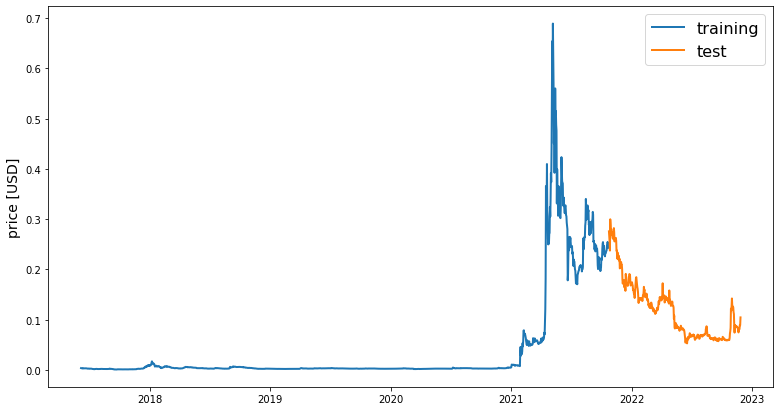

In [ ]:
#shows the training and testing split graphically
line_plot(train[target_col], test[target_col], 'training', 'test', title='')  

In [ ]:
#normalizing data
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [ ]:
#extracting the window data for the dataframe with window length of 5
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [ ]:
#processing the data and splitting the test and train data
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [ ]:
#building the LSTM model using a function

def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [ ]:
#variable initialization

np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [ ]:
#split the data into train and test
train, test, X_train, X_test, y_train, y_test = prepare_data(hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [ ]:
#building the lstm model

model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
50/50 [==============================] - 3s 20ms/step - loss: 0.0637 - val_loss: 0.0072
Epoch 2/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0380 - val_loss: 0.0086
Epoch 3/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0346 - val_loss: 0.0055
Epoch 4/20
50/50 [==============================] - 0s 10ms/step - loss: 0.0357 - val_loss: 0.0055
Epoch 5/20
50/50 [==============================] - 0s 10ms/step - loss: 0.0298 - val_loss: 0.0047
Epoch 6/20
50/50 [==============================] - 0s 10ms/step - loss: 0.0304 - val_loss: 0.0060
Epoch 7/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0303 - val_loss: 0.0046
Epoch 8/20
50/50 [==============================] - 0s 10ms/step - loss: 0.0282 - val_loss: 0.0051
Epoch 9/20
50/50 [==============================] - 0s 10ms/step - loss: 0.0269 - val_loss: 0.0049
Epoch 10/20
50/50 [==============================] - 0s 10ms/step - loss: 0.0292 - val_loss: 0.0050
Epoch 11/20


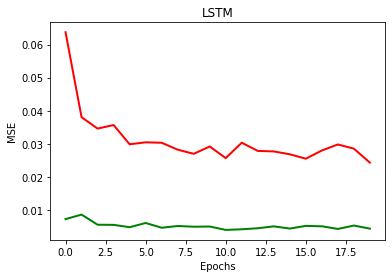

In [ ]:
#plotting the error graph
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',linewidth=2, label='Train loss')
plt.plot(history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [ ]:
#dispalying the mean squared error
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

13/13 [==============================] - 1s 3ms/step


0.04237333957401915

In [ ]:
#displaying MAE
from sklearn.metrics import mean_squared_error
MAE=mean_squared_error(preds, y_test)
MAE


0.004310869584313872

In [ ]:
#displaying r squared
from sklearn.metrics import r2_score
R2=r2_score(y_test, preds)
R2*100

77.04469632862808

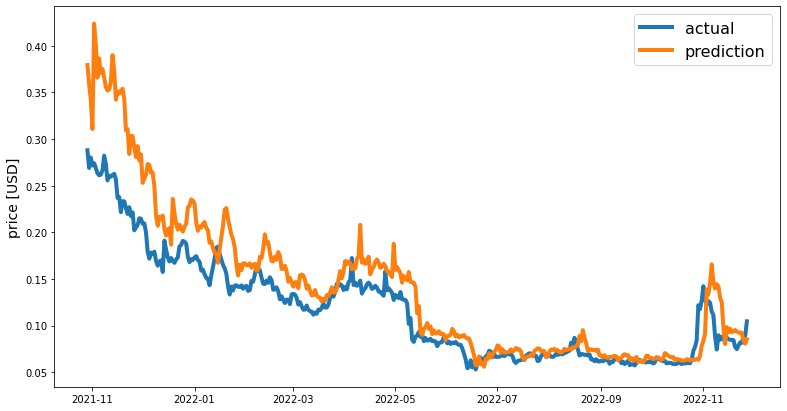

In [ ]:
#plitting the actual vs predicted values
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=4)